# Linear Regression (continued)

In a [previous report](https://github.com/marty-vanhoof/Maching_Learning/blob/master/Linear_Regression/Linear_Regression.ipynb), we went into some detail about linear regression and the batch gradient descent algorithm.  We also worked through an example in the case of simple linear regression where we had one feature and we were trying to fit a line to the data.  In **multiple linear regression** there are at least two features, so if $n$ is the number of features, then the objective of the gradient descent algorithm is the learn a function $h_\theta: \mathbb{R}^n \rightarrow \mathbb{R}$ of the form

$$ h_\theta(\mathbf{x}) = \theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n \,, $$

which means we are trying to fit a hyperplane to the data in higher dimensions.  

A picture for the case of two features is shown below 

<img src="least_squares_plane.png">
<br/>

Now let's consider an example of trying to predict the price of a house based on the two features:  

- size (in square feet) 
- number of bedrooms.

We have [data](https://github.com/marty-vanhoof/Maching_Learning/blob/master/data/ex1data2.txt) consisting of the sizes, number of bedrooms, and selling prices from 47 houses in a particular city that we will use to train a linear regression model.  We will use Pandas to analyze the data.

In [50]:
# import the relevant modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# load the dataframe and look at first 5 rows of the dataset
filepath = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(filepath, names = ['size', 'bedrooms', 'price'])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Scaling

Notice that the two features, ```size``` and ```bedrooms```, are on very different scales.  A typical size of a house (in square feet) is on the order of almost 1000 times the number of bedrooms.  The graph of the cost function $J(\theta)$ is a convex 3 dimensional shape (a manifold) embedded in $\mathbb{R}^4$, and the gradients in the direction corresponding to the smaller scale feature (```bedrooms```) will be a lot steeper than the gradients in the direction corresponding to the larger scale feature (```size```).  This can cause the gradient descent algorithm to converge more slowly.

A solution to this is to **standardize** the features, which means putting them all on the same scale with mean 0 and standard deviation 1.  Let $m_j$ be the sample mean and $s_j$ the sample standard deviation for the $j^{\mathrm{th}}$ feature.  If $\mathbf{x}$ is a feature vector, then we standardize it by subtracting the mean from each component and then dividing by the standard deviation

$$ x'_j := \frac{x_j - m_j}{s_j} \,.$$

Here, $x_j$ is the $j^{th}$ component of $\mathbf{x}$.  We should do this for all training examples in our dataset.

In [52]:
# save feature means and standard deviations for later
mean_size, mean_bedrooms = df.mean()['size'], df.mean()['bedrooms']
std_size, std_bedrooms = df.std()['size'], df.std()['bedrooms']

def standardize(d):
    '''Standardize each entry in d.'''
    
    return ( d - d.mean() ) / d.std()

# standardize the size and bedrooms columns and insert a column of ones
features_scaled = standardize( df[['size', 'bedrooms']] )
features_scaled.insert(0, 'ones', 1)

# look at the first 5 rows
features_scaled.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [53]:
# get the training data X, target variable y, and intialize theta to (0,0,0)
X = features_scaled
y = df['price']
theta = np.array([0,0,0])

# transform X, y, theta into numpy matrices
X, y, theta = np.matrix(X), np.matrix(y).T, np.matrix(theta)

### Finding a Good Learning Rate

Remember that the objective of the gradient descent algorithm is to minimize the cost function $J(\theta)$. The learning rate $\alpha$ controls how fast the algorithm converges.  For a smaller $\alpha$, the algorithm takes longer to converge to the optimal value of $J(\theta)$.  If $\alpha$ is too large, $J(\theta)$ can get very large and diverge.  Let's look at some plots to see how $J(\theta)$ changes according to the number of iterations and for several different values of $\alpha$.

The graph below shows that $J(\theta)$ converges more slowly when $\alpha = 0.01$ and much faster when $\alpha = 0.3$.

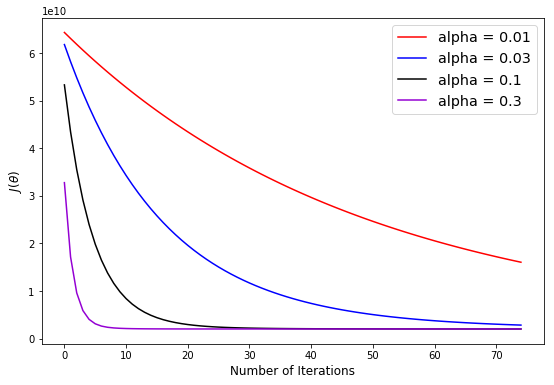

In [54]:
from collections import defaultdict
from lin_reg_scripts import gradient_descent

def cost_hist(alpha_vals, num_iterations):
    '''Make a dictionary of cost histories for different values
    of the learning rate alpha.  Each dict key is an alpha value
    and each dict value is a list consisting of the values of the
    cost function for each iteration of gradient_descent()'''
    
    hist_dict = defaultdict()
    for alph in alpha_vals:
        hist = gradient_descent(X, y, theta, alph, num_iterations)[1]
        hist_dict[alph] = hist
    
    return hist_dict 

num_iter = 75
# alpha values and colours for the plot
a_vals = [0.01, 0.03, 0.1, 0.3] 
colours = ['red', 'blue', 'black', 'darkviolet']
# all the cost histories to use for the plot
c_hist = cost_hist(a_vals, num_iter)

# make the plot
fig, ax = plt.subplots( figsize = (9,6) )
for alph, colour in zip(a_vals, colours):
    ax.plot( np.arange(num_iter), c_hist[alph], colour, label = 'alpha = {}'.format(alph) )

ax.legend(fontsize = 'x-large')
ax.set_xlabel('Number of Iterations', fontsize=12)
ax.set_ylabel(r'$J(\theta)$', fontsize=12)
plt.show()

### Performing the Linear Regression

According the the above graph with a learning rate $\alpha = 0.3$, the cost function $J(\theta)$ will converge to the optimal value very quickly (it seems to get close after only 20-30 iterations).  Let's run the gradient descent algorithm with 75 iterations to try and squeeze the most juice out of it.  After a certain point, there will be very little movement in $J(\theta)$, but 75 iterations isn't very much.

In [55]:
# run gradient_descent() with the parameters below
alpha = 0.3
num_iterations = 75
theta_fit, cost_hist = gradient_descent(X, y, theta, alpha, num_iterations)

# get theta_fit parameters
theta_0 = theta_fit[0,0]
theta_1 = theta_fit[0,1]
theta_2 = theta_fit[0,2]

print('theta_fit = ', theta_fit, '\n')
print('theta_fit components: ', theta_0, theta_1, theta_2, '\n')
print('J(theta_fit) = ', cost_hist[num_iterations-1])

theta_fit =  [[ 340412.65957365  110629.22202883   -6647.6460208 ]] 

theta_fit components:  340412.659574 110629.222029 -6647.6460208 

J(theta_fit) =  2043280052.04


### Interpreting and Visualizing the Results

So after 75 iterations, the algorithm returns the fitted parameters (rounded to the nearest integer): 

$$ \theta_0 = 340,413\,, \quad \theta_1 = 110,629\,, \quad \theta_2 = -6,648\,. $$

Therefore, the linear function that best fits the data is

$$
\begin{array}{11}
h_\theta(\mathbf{x})& = \quad \theta_0 + \theta_1 x_1 + \theta_2 x_2 \\
& = \quad 340,413 + 110,629 x_1 - 6,648 x_2 
\end{array}
$$

In other words, this means that according to our model, we can predict the price of a house by 

$$ \mathrm{price} \approx 340,413 + 110,629 \cdot \mathrm{size} - 6,648 \cdot \mathrm{bedrooms} $$

The graph of this linear function with the training data is given below

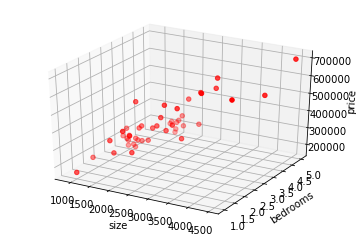

In [56]:
from mpl_toolkits.mplot3d import Axes3D

x = df['size']
y = df['bedrooms']
z = df['price']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['size'], df['bedrooms'], df['price'], c='red', marker='o' )
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()